In [1]:
#Geers up
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train = pd.read_csv('data/train_u6lujuX_CVtuZ9i.csv')

In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df_train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [19]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


In [7]:
df_train['Gender'] = df_train['Gender'].fillna( 
                               df_train['Gender'].dropna().mode().values[0] )
df_train['Married'] = df_train['Married'].fillna( 
                               df_train['Married'].dropna().mode().values[0] )
df_train['Dependents'] = df_train['Dependents'].fillna( 
                               df_train['Dependents'].dropna().mode().values[0] )
df_train['Self_Employed'] = df_train['Self_Employed'].fillna( 
                               df_train['Self_Employed'].dropna().mode().values[0] )
df_train['LoanAmount'] = df_train['LoanAmount'].fillna( 
                               df_train['LoanAmount'].dropna().mean() )
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna( 
                               df_train['Loan_Amount_Term'].dropna().mode().values[0] )
df_train['Credit_History'] = df_train['Credit_History'].fillna(
                               df_train['Credit_History'].dropna().mode().values[0] )

In [9]:
df_train['LoanAmount'].value_counts()

146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
570.000000     1
300.000000     1
376.000000     1
117.000000     1
311.000000     1
Name: LoanAmount, Length: 204, dtype: int64

In [10]:
df_train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [11]:
df_train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
df_train['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df_train['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [14]:
df_train['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

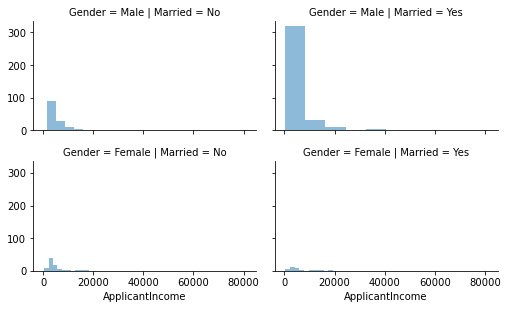

In [20]:
grid = sns.FacetGrid(df_train, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

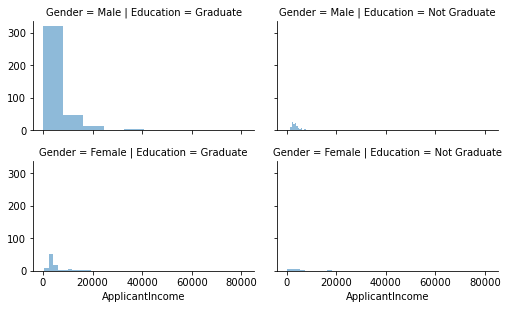

In [21]:
grid = sns.FacetGrid(df_train, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

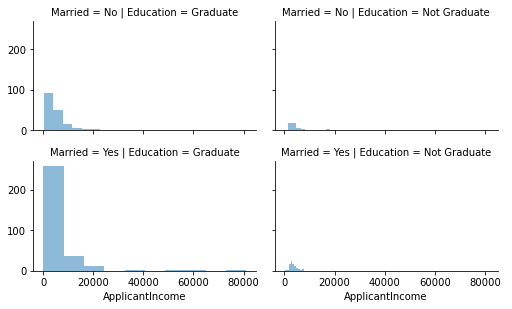

In [22]:
grid = sns.FacetGrid(df_train, row='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

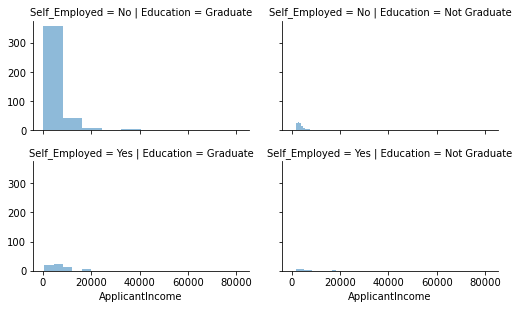

In [23]:
grid = sns.FacetGrid(df_train, row='Self_Employed', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

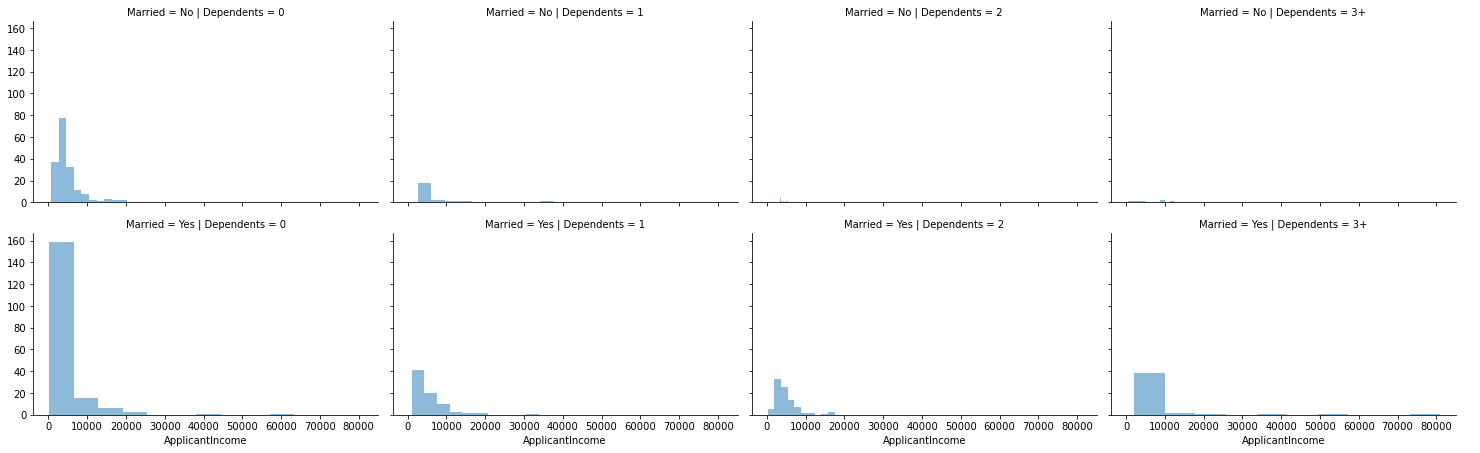

In [24]:
grid = sns.FacetGrid(df_train, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

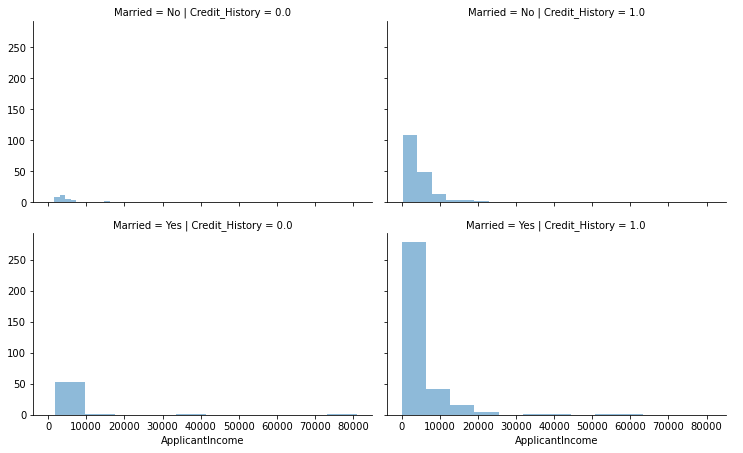

In [25]:
grid = sns.FacetGrid(df_train, row='Married', col='Credit_History', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

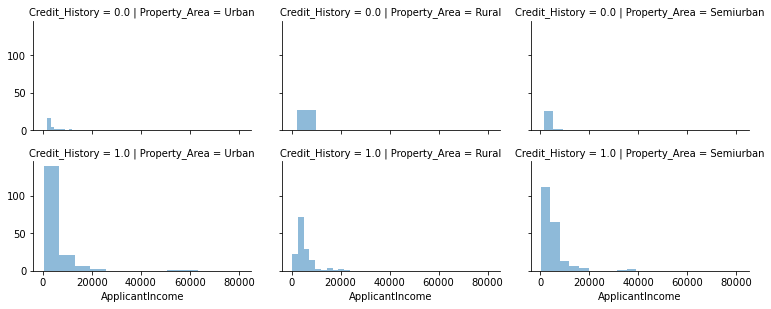

In [26]:
grid = sns.FacetGrid(df_train, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

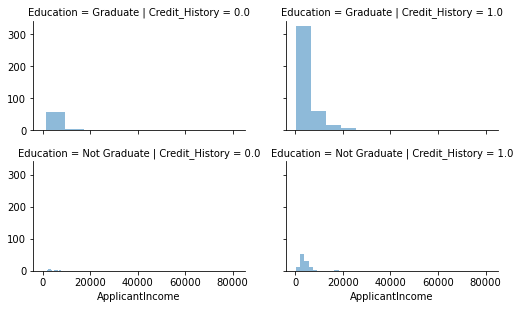

In [27]:
grid = sns.FacetGrid(df_train, row='Education', col='Credit_History', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

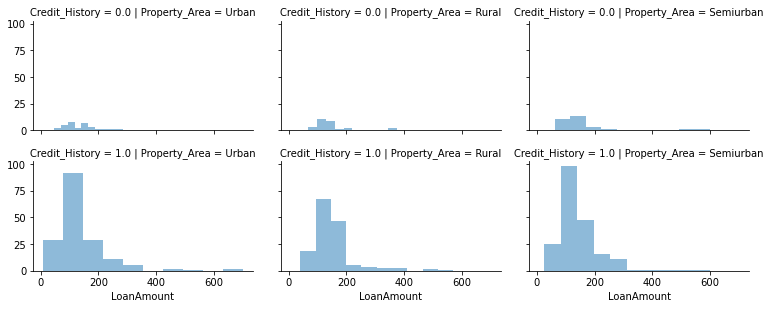

In [28]:
grid = sns.FacetGrid(df_train, row='Credit_History', col='Property_Area', size=2.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=10)
grid.add_legend()

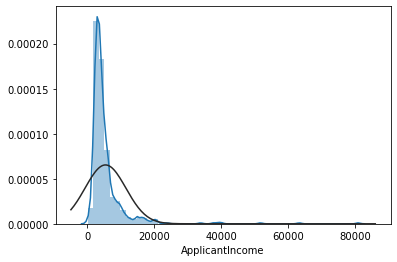

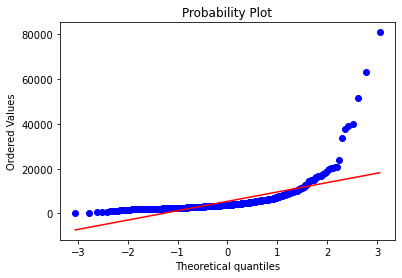

In [29]:
#histogram and normal probability plot
sns.distplot(df_train['ApplicantIncome'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['ApplicantIncome'], plot=plt)

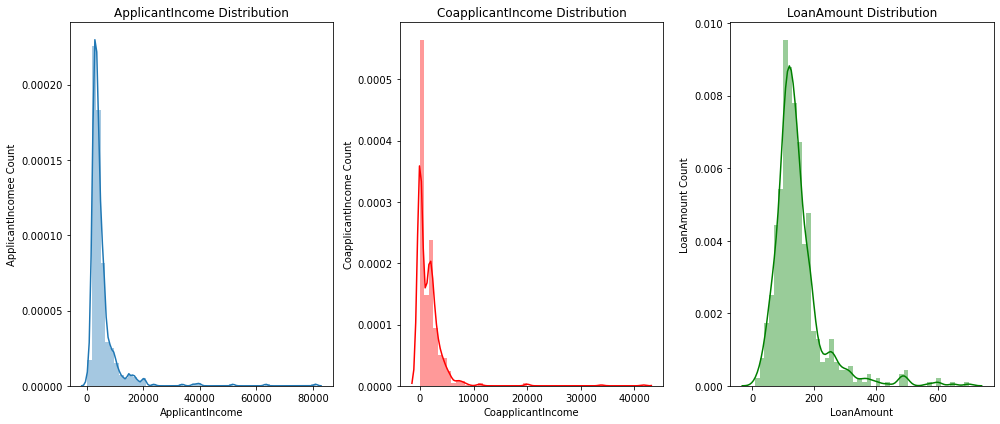

<Figure size 432x288 with 0 Axes>

In [30]:
flg, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14,6))

sns.distplot(df_train['ApplicantIncome'], ax = axes[0]).set_title('ApplicantIncome Distribution')
axes[0].set_ylabel('ApplicantIncomee Count')

sns.distplot(df_train['CoapplicantIncome'], color = "r", ax = axes[1]).set_title('CoapplicantIncome Distribution')
axes[1].set_ylabel('CoapplicantIncome Count')

sns.distplot(df_train['LoanAmount'],color = "g", ax = axes[2]).set_title('LoanAmount Distribution')
axes[2].set_ylabel('LoanAmount Count')

plt.tight_layout()
plt.show()
plt.gcf().clear()

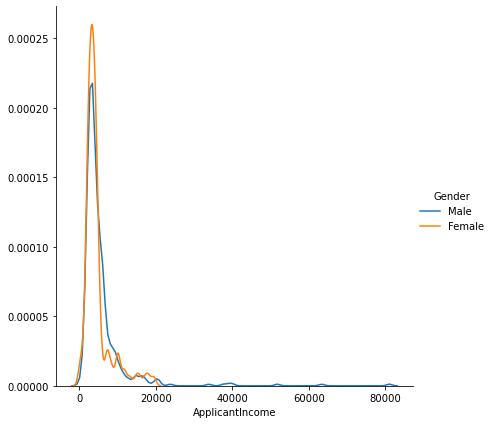

In [31]:
sns.FacetGrid(df_train, hue="Gender", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

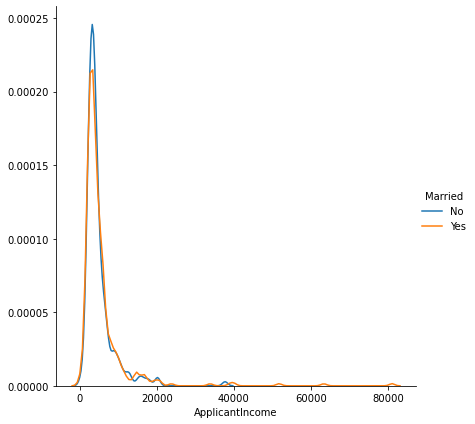

In [32]:
sns.FacetGrid(df_train, hue="Married", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

In [33]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

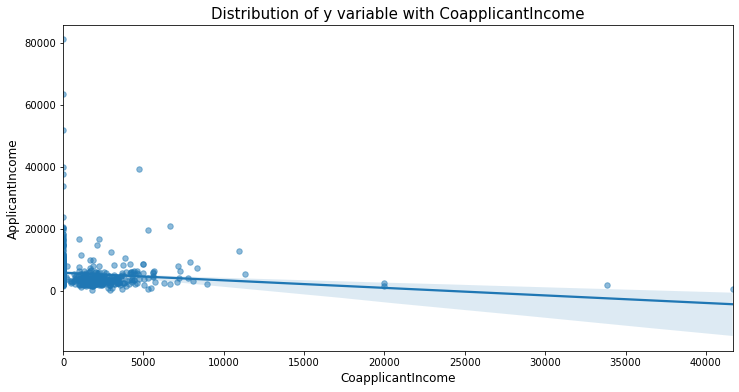

In [34]:
var_name = "CoapplicantIncome"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df_train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

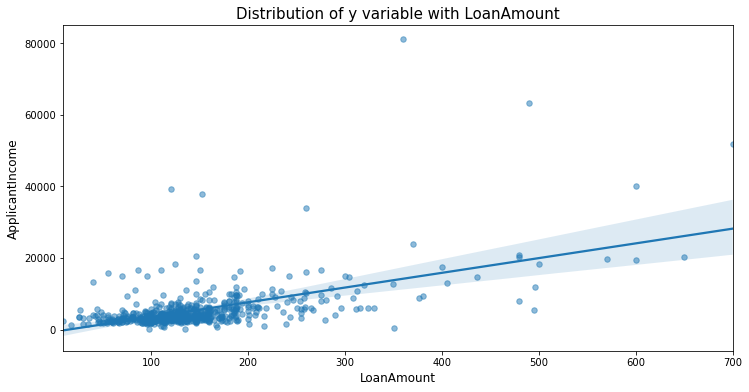

In [35]:
var_name = "LoanAmount"
plt.figure(figsize=(12,6))
sns.regplot(x=var_name, y='ApplicantIncome', data=df_train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('ApplicantIncome', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

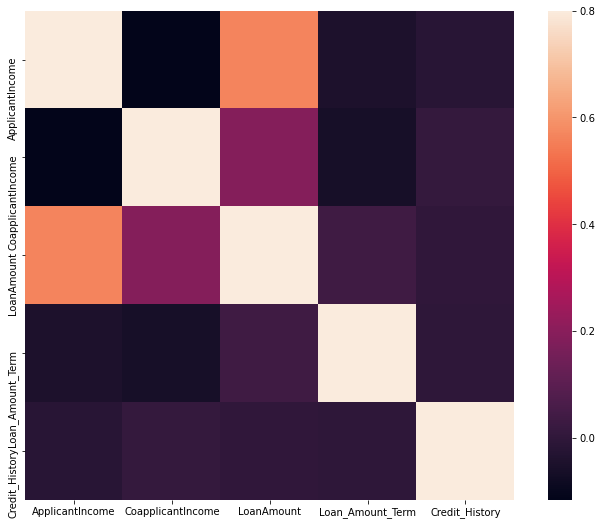

In [36]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

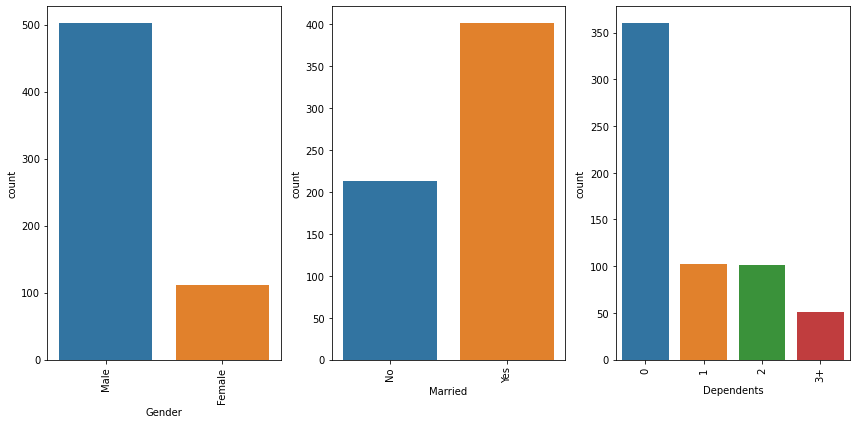

<Figure size 432x288 with 0 Axes>

In [37]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df_train["Gender"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df_train["Married"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df_train["Dependents"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

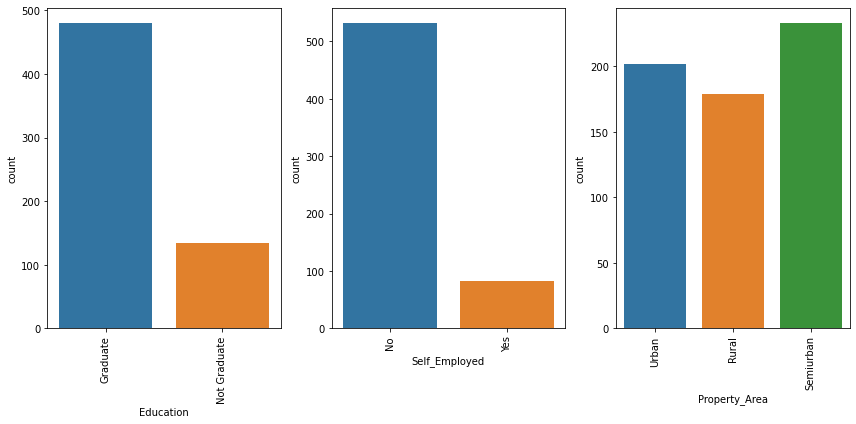

<Figure size 432x288 with 0 Axes>

In [38]:
fig, axes = plt.subplots(ncols=3,figsize=(12,6))

g = sns.countplot(df_train["Education"], ax=axes[0])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df_train["Self_Employed"], ax=axes[1])
plt.setp(g.get_xticklabels(), rotation=90)
g = sns.countplot(df_train["Property_Area"], ax=axes[2])
plt.setp(g.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()
plt.gcf().clear()

In [39]:
print(df_train.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [40]:
df_train.shape

(614, 13)

In [41]:
df_train[['Gender', 'ApplicantIncome']].groupby(['Gender'],
                                               as_index = False).mean().sort_values(by = 'Gender', ascending = False)

,Gender,ApplicantIncome
1,Male,5573.017928
0,Female,4643.473214


In [42]:
df_train[['Married', 'ApplicantIncome']].groupby(['Married'],
                                               as_index = False).mean().sort_values(by = 'Married', ascending = False)

,Married,ApplicantIncome
1,Yes,5633.496259
0,No,4970.384977


In [43]:
df_train[['Dependents', 'ApplicantIncome']].groupby(['Dependents'],
                                               as_index = False).mean().sort_values(by = 'Dependents', ascending = False)

,Dependents,ApplicantIncome
3,3+,8581.215686
2,2,4926.782178
1,1,5962.274510
0,0,4928.680556


In [44]:
df_train[['Education', 'ApplicantIncome']].groupby(['Education'],
                                               as_index = False).mean().sort_values(by = 'Education', ascending = False)

,Education,ApplicantIncome
1,Not Graduate,3777.283582
0,Graduate,5857.433333


In [45]:
df_train[['Self_Employed', 'ApplicantIncome']].groupby(['Self_Employed'],
                                               as_index = False).mean().sort_values(by = 'Self_Employed', ascending = False)

,Self_Employed,ApplicantIncome
1,Yes,7380.817073
0,No,5098.678571


In [46]:
df_train[['Gender', 'Married', 'ApplicantIncome']].groupby(['Gender', 'Married'],
                                               as_index = False).mean().sort_values(by = 'Gender', 
                                                                                          ascending = False)

,Gender,Married,ApplicantIncome
2,Male,No,5251.045113
3,Male,Yes,5689.067751
0,Female,No,4503.787500
1,Female,Yes,4992.687500


In [47]:
df_train.groupby(['Gender']).size()[0]/(df_train.groupby(['Gender']).size()[0] + 
                                        df_train.groupby(['Gender']).size()[1])    

0.18241042345276873